# Запуск модели и сохранение полученных данных

In [27]:
import subprocess


def start_model(mode, height, width, n_preys, n_predators, seed):
    
    height = str(height)
    width = str(width)
    n_preys = str(n_preys)
    n_predators = str(n_predators)
    seed = str(seed)
    
    model = subprocess.run(["pp-model", mode, width, height, n_predators, n_preys, seed], stdout=subprocess.PIPE)
    return_code = model.returncode
    
    if mode == "L":
        
        filename = '%sx%s_%s_%s_%s.csv' % (width, height, n_predators, n_preys, seed)
        f = open(filename, 'r')
        
        predators = []
        preys = []

        for line in f:
            data = line.split(',')
            predators.append(int(data[1]))
            preys.append(int(data[2]))
        return predators, preys, return_code
    
    else:
        return return_code

predators, preys, steps = start_model("L", 200, 200, 3000, 3000, 13)

# Анализ данных и построение графика завсимости количества агентов в моделе от числа шагов

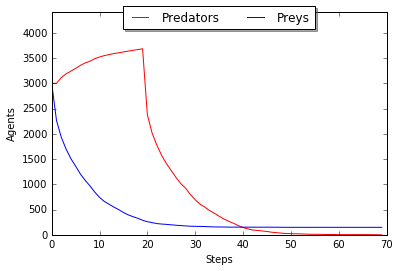

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

t = np.arange(0, steps + 1)
plt.plot(t, predators, "r", label="Predators")
plt.plot(t, preys, "b", label="Preys")
plt.ylim([0, max(predators + preys) * 1.2])
plt.ylabel("Agents")
plt.xlabel("Steps")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), shadow=True, ncol=2)
plt.show()

# Запуск модели с одинаковыми параметрами и разными псевдослучайными последовательностями, сбор информации о времени ее жизни

In [62]:
steps = []
for seed in range(0, 100):
    steps.append(start_model("S", 200, 200, 3000, 3000, seed))
print(steps)

[68, 68, 65, 93, 69, 71, 70, 67, 71, 85, 80, 86, 73, 69, 65, 67, 60, 98, 71, 67, 65, 82, 66, 81, 76, 82, 69, 70, 82, 78, 71, 61, 81, 70, 71, 69, 78, 68, 59, 72, 70, 75, 69, 66, 73, 61, 74, 74, 61, 85, 70, 81, 65, 64, 70, 70, 65, 68, 68, 59, 65, 80, 71, 70, 71, 79, 68, 68, 62, 80, 74, 69, 75, 66, 114, 69, 67, 67, 70, 71, 62, 66, 70, 71, 68, 69, 72, 72, 67, 68, 72, 82, 91, 72, 71, 67, 74, 67, 83, 67]


# Обработка полученных данных, построение гистограммы показывающей вероятность значений времени жизни модели  

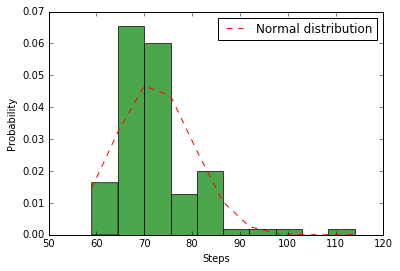

In [67]:
import matplotlib.mlab as mlab

sorted(steps)
n_bins = int(np.ceil(np.sqrt(len(steps))))
sigma = np.std(steps)
mu = np.mean(steps)

n, bins, patches = plt.hist(steps, n_bins, normed=True, color="green", alpha=0.7,)

norm_pdf = mlab.normpdf(bins, mu, sigma)

plt.plot(bins, norm_pdf, "r--", label="Normal distribution")
plt.ylabel("Probability")
plt.xlabel("Steps")
plt.legend()
plt.show()